In [1]:
import torch
import torchvision.models as models

from Helper_funcs import *

In [2]:
model = models.alexnet(weights='DEFAULT')
model_aug = models.alexnet(weights='DEFAULT')
model_name = 'AlexNet'
input_size = 224

In [3]:
# Load dataset, replace classifier, and display the model architecture
train_loader, val_loader, test_loader = load_dataset(input_size, False)
replace_classifier(model, model_name)
display_model(model, input_size)

Input size = (3, 224, 224)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgP

In [4]:
# train the model
train(model, train_loader, val_loader, ('./models/best_' + model_name + '.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.9218
Epoch [1/30], Training Loss: 0.3640 - Validation Loss: 0.2135 - Validation Accuracy: 0.9218
Saving the model with validation accuracy: 0.9375
Epoch [2/30], Training Loss: 0.3309 - Validation Loss: 0.1922 - Validation Accuracy: 0.9375
Epoch [3/30], Training Loss: 0.3279 - Validation Loss: 0.1979 - Validation Accuracy: 0.9289
Saving the model with validation accuracy: 0.9406
Epoch [4/30], Training Loss: 0.3247 - Validation Loss: 0.1955 - Validation Accuracy: 0.9406
Saving the model with validation accuracy: 0.9526
Epoch [5/30], Training Loss: 0.3288 - Validation Loss: 0.1604 - Validation Accuracy: 0.9526
Epoch [6/30], Training Loss: 0.3236 - Validation Loss: 0.1687 - Validation Accuracy: 0.9522
Epoch [7/30], Training Loss: 0.3273 - Validation Loss: 0.1906 - Validation Accuracy: 0.9352
Saving the model with validation accuracy: 0.9532
Epoch [8/30], Training Loss: 0.3264 - Validation Loss: 0.1589 - 

In [5]:
# Load the best preforming model, test classification time and overall accuracy
load_model(model, './models/best_' + model_name + '.pth')
evaluate_time(model)
evaluate_accuracy(model, test_loader)

Predicted class: testing-a, Actual label: testing-a, time: 0.0130
Predicted class: testing-a, Actual label: testing-a, time: 0.0009
Predicted class: testing-c, Actual label: testing-b, time: 0.0010
Predicted class: testing-c, Actual label: testing-b, time: 0.0010
Predicted class: testing-c, Actual label: testing-c, time: 0.0010
Predicted class: testing-c, Actual label: testing-c, time: 0.0010
Predicted class: testing-d, Actual label: testing-d, time: 0.0011
Predicted class: testing-d, Actual label: testing-d, time: 0.0010
Predicted class: testing-e, Actual label: testing-e, time: 0.0010
Predicted class: testing-e, Actual label: testing-e, time: 0.0011
Predicted class: testing-c, Actual label: testing-f, time: 0.0010
Predicted class: testing-d, Actual label: testing-f, time: 0.0011
Average time for prediction: 0.0020 seconds
Overall test accuracy: 92.29%


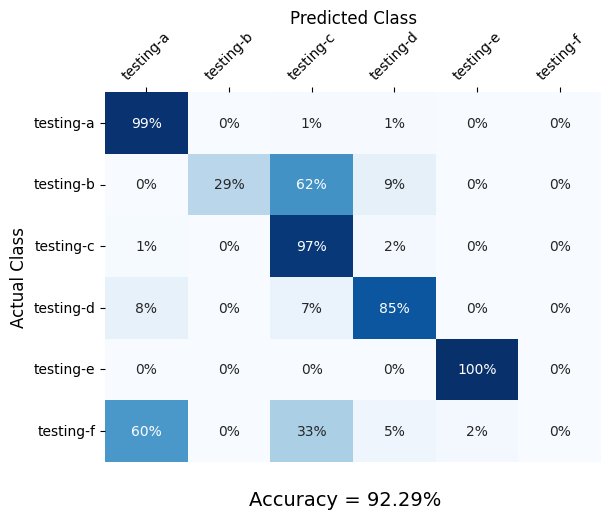

In [6]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model, test_loader)

In [7]:
# Create another model with the augmented dataset
train_loader_aug, val_loader_aug, test_loader_aug = load_dataset(input_size, True)
replace_classifier(model_aug, model_name)

In [8]:
# train the model
train(model_aug, train_loader_aug, val_loader_aug, ('./models/best_' + model_name + '_augmented.pth'))

Using: [cuda] - [NVIDIA GeForce RTX 3080]
Saving the model with validation accuracy: 0.8264
Epoch [1/30], Training Loss: 0.7482 - Validation Loss: 0.5391 - Validation Accuracy: 0.8264
Saving the model with validation accuracy: 0.8284
Epoch [2/30], Training Loss: 0.6135 - Validation Loss: 0.4803 - Validation Accuracy: 0.8284
Epoch [3/30], Training Loss: 0.5901 - Validation Loss: 0.5844 - Validation Accuracy: 0.8167
Saving the model with validation accuracy: 0.8488
Epoch [4/30], Training Loss: 0.5755 - Validation Loss: 0.4800 - Validation Accuracy: 0.8488
Epoch [5/30], Training Loss: 0.5747 - Validation Loss: 0.4941 - Validation Accuracy: 0.8477
Epoch [6/30], Training Loss: 0.5777 - Validation Loss: 0.4433 - Validation Accuracy: 0.8369
Epoch [7/30], Training Loss: 0.5574 - Validation Loss: 0.5296 - Validation Accuracy: 0.8252
Epoch [8/30], Training Loss: 0.5677 - Validation Loss: 0.4448 - Validation Accuracy: 0.8471
Saving the model with validation accuracy: 0.8502
Epoch [9/30], Training

In [9]:
# Test the accuracy of the model with augmented data
load_model(model_aug, './models/best_' + model_name + '_augmented.pth')
evaluate_accuracy(model_aug, test_loader_aug)

Overall test accuracy: 86.16%


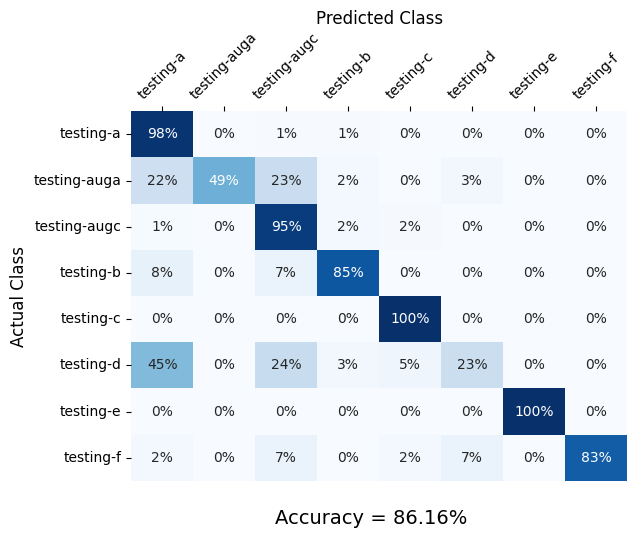

In [10]:
# Print a confusion matrix of predicted vs actual class labels
create_confusion_matrix(model_aug, test_loader_aug)